# Installing the packages


In [1]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.2/585.2 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB 23.4 MB/s eta 0:00:00


In [2]:
!pip install roboflow 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.0 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=46da77bb3e3976f4682455a4a99dee05c59aef81ddb3d9cf4115f64a074e7566
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
    

Import libararies:

In [3]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Dataset from roboflow

In [4]:
#downloading dataset from roboflow
from roboflow import Roboflow

rf = Roboflow(api_key="Wl5of13ePuNTPCIPn08c")
project = rf.workspace("arms-l4rlk").project("people-with-arms")
dataset = project.version(6).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.103, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to People-with-arms-6 in yolov8:: 100%|██████████| 7822/7822 [00:03<00:00, 2594.78it/s]


In [5]:
#start the training process with the downloaded dataset
!yolo task=detect \
mode=train \
model=yolov8s.pt \
data=/content/People-with-arms-6/data.yaml \
epochs=100 \
imgsz=640

100% 21.5M/21.5M [00:00<00:00, 155MB/s]
Ultralytics YOLOv8.0.103 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/People-with-arms-6/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=Fal

**Upload to Roboflow**

In [6]:
project.version(6).deploy(model_type="yolov8", model_path='/content/runs/detect/train/')

Dependency ultralytics<=8.0.20 is required but found version=8.0.103, to fix: `pip install ultralytics<=8.0.20`
View the status of your deployment at: https://app.roboflow.com/arms-l4rlk/people-with-arms/deploy/6
Share your model with the world at: https://universe.roboflow.com/arms-l4rlk/people-with-arms/model/6


# Create zip and download

In [8]:
!yolo task=detect \
mode=predict \
model=/content/runs/detect/train/weights/best.pt \
conf=0.2 \
source=/content/test

Ultralytics YOLOv8.0.103 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/3 /content/test/210.jpg: 480x640 2 humans, 1 human_with_gun, 75.8ms
image 2/3 /content/test/250.jpg: 480x640 1 human, 1 human_with_gun, 13.1ms
image 3/3 /content/test/frame_8_156.png: 384x640 4 humans, 3 human_with_guns, 1 people-arm, 63.3ms
Speed: 2.0ms preprocess, 50.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


In [7]:
!zip -r /content/runs.zip /content/runs 

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/events.out.tfevents.1684276580.d77ec08d64c4.1977.0 (deflated 72%)
  adding: content/runs/detect/train/val_batch0_pred.jpg (deflated 13%)
  adding: content/runs/detect/train/results.png (deflated 8%)
  adding: content/runs/detect/train/labels_correlogram.jpg (deflated 32%)
  adding: content/runs/detect/train/train_batch1.jpg (deflated 7%)
  adding: content/runs/detect/train/state_dict.pt (deflated 8%)
  adding: content/runs/detect/train/PR_curve.png (deflated 10%)
  adding: content/runs/detect/train/roboflow_deploy.zip (stored 0%)
  adding: content/runs/detect/train/val_batch0_labels.jpg (deflated 13%)
  adding: content/runs/detect/train/weights/ (stored 0%)
  adding: content/runs/detect/train/weights/last.pt (deflated 8%)
  adding: content/runs/detect/train/weights/best.pt (deflated 8%)
  adding: content/runs/detect/train/va

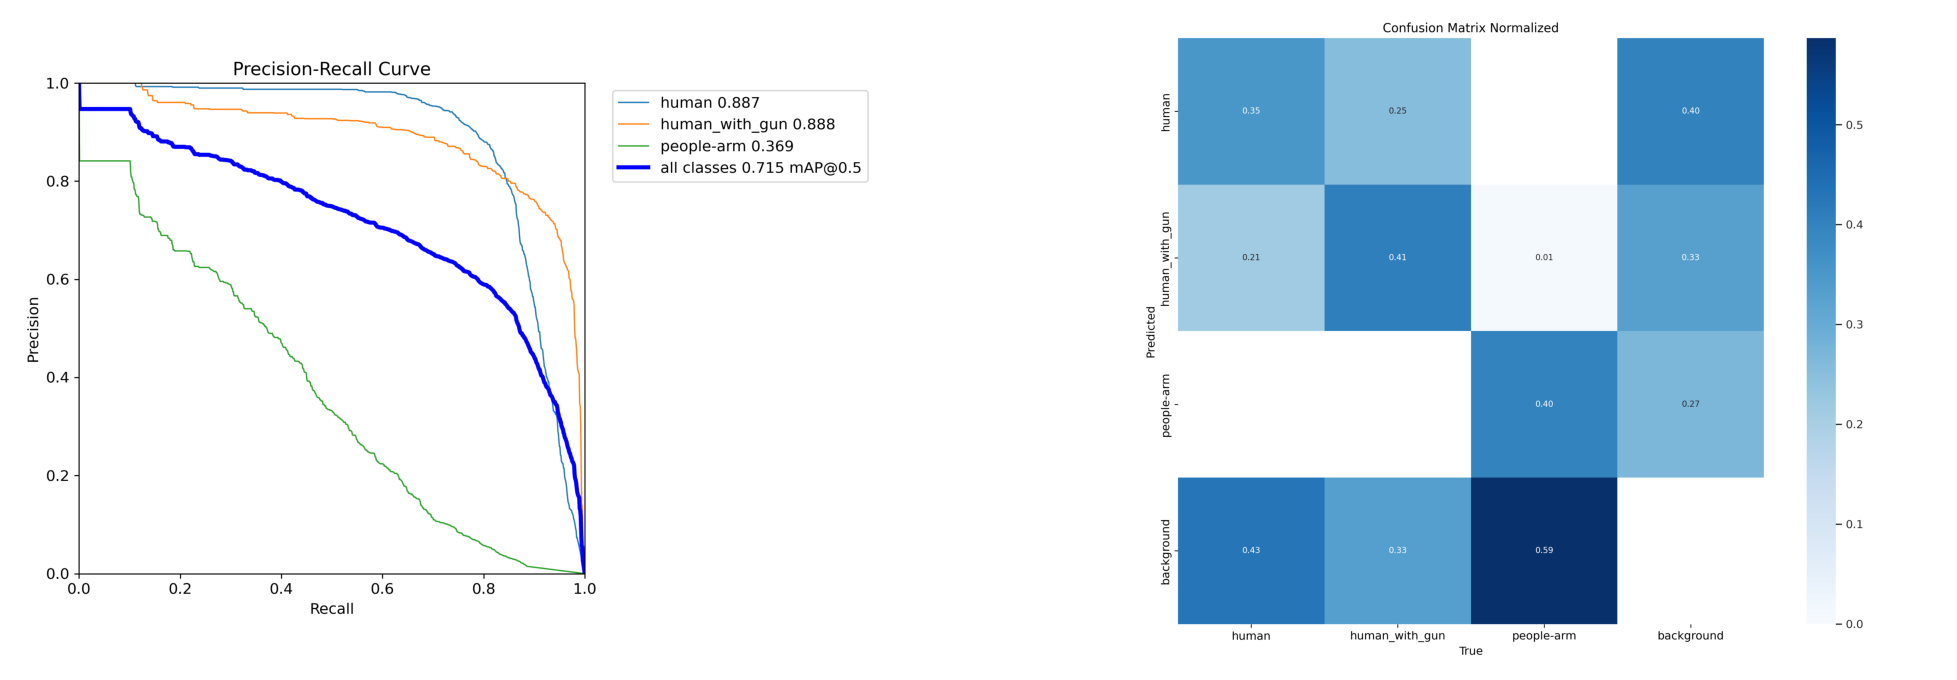

In [19]:
pr_curve = cv2.imread("/content/runs/detect/train/PR_curve.png", cv2.IMREAD_COLOR)
conf_matr = cv2.imread("/content/runs/detect/train/confusion_matrix_normalized.png", cv2.IMREAD_COLOR)

pr_curve = cv2.cvtColor(pr_curve, cv2.COLOR_BGR2RGB)
conf_matr = cv2.cvtColor(conf_matr, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 2, figsize=(25, 10))
 
axs[0].axis('off')
axs[0].imshow(pr_curve.astype('uint8'))

axs[1].axis('off')
axs[1].imshow(conf_matr.astype('uint8'))

plt.show()